In [1]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
import time
#import the IMDb csv file
bucket_list=pd.read_csv('Top 100 Movies Bucket List.csv',engine='python')
# Need the Movie id to iterate through web pages to obtain technical detail
const_id= [x for x in bucket_list['Const']]


In [2]:
# Create a dataframe with the movie's technical specifications
# Getting the processor time for code
start = time.process_time()
def techdet(x):
    global df
    df=pd.DataFrame()
    for ids in x:
        # Get description of movie
        url1= 'https://www.imdb.com/title/{}/?ref_=ttls_li_tt'.format(ids)
        page1=bs(urllib.request.urlopen(url1))
        diction={}
        diction['Title']=ids
        diction['Description']=[x.text.strip() for x in page1.find_all('div', attrs={'class': re.compile( "summary_text")})][0]
        url= 'https://www.imdb.com/title/{}/technical?ref_=tt_dt_spec'.format(ids)
        page=bs(urllib.request.urlopen(url))
        # Technical specifications
        tech=[x.text.strip() for x in page.find_all('td', attrs={'class': re.compile( "label")})]
        # Details for Technical specifications
        details=[x.text.strip() for x in page.find_all('td')]

        for element in details:
            if element not in tech:
                diction[details[details.index(element)-1]]= element
            elif element == 'Color':

                diction['Color']= element
            else:
                continue
        df=df.append(diction, ignore_index=True)
        
techdet(const_id)    
print(time.process_time() - start)
df.head()

29.444447000000004


,Aspect Ratio,Camera,Cinematographic Process,Color,Description,Film Length,Laboratory,Negative Format,Printed Film Format,Runtime,Sound Mix,Title
0,1.85 : 1,"Arriflex 35 BL4S, Zeiss Standard Speed and Sup...",Spherical,Color,Two imprisoned men bond over a number of years...,"3,907 m\n \n (Sweden)","DuArt Film Laboratories Inc., New York, USA\n ...","35 mm\n (Eastman EXR 100T 5248, EXR 2...",35 mm,2 hr 22 min (142 min),Dolby Digital\n|\nSDDS,tt0111161
1,1.37 : 1\n (negative ratio)\n ...,"Arriflex 35 IIC, Bausch & Lomb Super Baltar Le...",Digital Intermediate\n (4K) (2008 Res...,Color\n (Technicolor),The aging patriarch of an organized crime dyna...,"177 m\n \n \n 4,803.8...","Technicolor S.p.a., Roma, Italy\n \n ...",35 mm\n (Eastman 100T 5254),35 mm\n (Technicolor dye transfer print...,2 hr 55 min (175 min),DTS\n (re-release)\n |\nMono,tt0068646
2,1.37 : 1\n (negative ratio)\n ...,"Arriflex 35 IIC, Bausch & Lomb Super Baltar an...",Digital Intermediate\n (4K) (2008 Res...,Color\n (Technicolor),The early life and career of Vito Corleone in ...,"5,482 m\n (12 reels)","Technicolor S.p.a., Roma, Italy\n \n ...",35 mm\n (Eastman 100T 5254),Technicolor Dye-Transfer prints\n (35mm...,3 hr 22 min (202 min) \n 3...,Mono,tt0071562
3,1.43 : 1\n (70mm IMAX - some scenes)\n ...,"Beaumont VistaVision Camera, Panavision Primo ...",IMAX\n (some scenes)\n \n ...,Color\n (Technicolor),When the menace known as the Joker wreaks havo...,"4,150 m\n \n (Sweden)\n ...","Astro Color Lab, Chicago (IL), USA\n ...",35 mm\n (also horizontal) (Kodak Visi...,35 mm\n (Kodak Vision 2383)\n ...,2 hr 32 min (152 min),Dolby Digital\n|\nSDDS\n|\nDTS\n|\nIMAX 6-Track,tt0468569
4,1.66 : 1,NaN,Spherical,Black and White,A jury holdout attempts to prevent a miscarria...,"2,625.65 m",NaN,35 mm,NaN,1 hr 36 min (96 min),Mono,tt0050083


In [3]:
# Clean the data
df.Title= bucket_list.Title
df['Year']=bucket_list.Year
df['Genres']=bucket_list.Genres
df['Directors']= bucket_list.Directors
df.replace({ r'\A\s+|\s+\Z': '', '\n' : ' '}, regex=True, inplace=True)
df

,Aspect Ratio,Camera,Cinematographic Process,Color,Description,Film Length,Laboratory,Negative Format,Printed Film Format,Runtime,Sound Mix,Title,Year,Genres,Directors
0,1.85 : 1,"Arriflex 35 BL4S, Zeiss Standard Speed and Sup...",Spherical,Color,Two imprisoned men bond over a number of years...,"3,907 m (Sweden)","DuArt Film Laboratories Inc., New York, USA ...","35 mm (Eastman EXR 100T 5248, EXR 20...",35 mm,2 hr 22 min (142 min),Dolby Digital | SDDS,The Shawshank Redemption,1994,Drama,Frank Darabont
1,1.37 : 1 (negative ratio) ...,"Arriflex 35 IIC, Bausch & Lomb Super Baltar Le...",Digital Intermediate (4K) (2008 Rest...,Color (Technicolor),The aging patriarch of an organized crime dyna...,"177 m 4,803.8 m ...","Technicolor S.p.a., Roma, Italy ...",35 mm (Eastman 100T 5254),35 mm (Technicolor dye transfer print)...,2 hr 55 min (175 min),DTS (re-release) | Mono,The Godfather,1972,"Crime, Drama",Francis Ford Coppola
2,1.37 : 1 (negative ratio) ...,"Arriflex 35 IIC, Bausch & Lomb Super Baltar an...",Digital Intermediate (4K) (2008 Rest...,Color (Technicolor),The early life and career of Vito Corleone in ...,"5,482 m (12 reels)","Technicolor S.p.a., Roma, Italy ...",35 mm (Eastman 100T 5254),Technicolor Dye-Transfer prints (35mm)...,3 hr 22 min (202 min) 3 ...,Mono,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola
3,1.43 : 1 (70mm IMAX - some scenes) ...,"Beaumont VistaVision Camera, Panavision Primo ...",IMAX (some scenes) ...,Color (Technicolor),When the menace known as the Joker wreaks havo...,"4,150 m (Sweden) ...","Astro Color Lab, Chicago (IL), USA (...",35 mm (also horizontal) (Kodak Visio...,35 mm (Kodak Vision 2383) ...,2 hr 32 min (152 min),Dolby Digital | SDDS | DTS | IMAX 6-Track,The Dark Knight,2008,"Action, Crime, Drama, Thriller",Christopher Nolan
4,1.66 : 1,NaN,Spherical,Black and White,A jury holdout attempts to prevent a miscarria...,"2,625.65 m",NaN,35 mm,NaN,1 hr 36 min (96 min),Mono,12 Angry Men,1957,Drama,Sidney Lumet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.33 : 1 (fullscreen) ...,Mitchell VistaVision Cameras,VistaVision,Color (Technicolor),A New York City advertising executive goes on ...,"3,725 m (Sweden) ...",Technicolor (as Technicol...,35 mm (horizontal),35 mm,2 hr 16 min (136 min),Mono (Westrex Recording System) ...,North by Northwest,1959,"Adventure, Mystery, Thriller",Alfred Hitchcock
96,1.66 : 1,"Mitchell BNC, Angenieux Lenses ...",Spherical,Black and White | Color (Warnercolor) ...,"In the future, a sadistic gang leader is impri...","3,754 m (Finland) ...","Technicolor, Hollywood (CA), USA (pr...",35 mm,NaN,2 hr 16 min (136 min),Dolby Digital (re-issue) ...,A Clockwork Orange,1971,"Crime, Drama, Sci-Fi",Stanley Kubrick
97,1.85 : 1,Moviecam Compact A...,Spherical,Color,"Unscrupulous boxing promoters, violent bookmak...",NaN,"DeLuxe, London, UK (as De...",35 mm,NaN,1 hr 44 min (104 min) 1 ...,Dolby Digital | SDDS,Snatch,2000,"Comedy, Crime",Guy Ritchie
98,2.39 : 1,"Arriflex 435 ES, Zeiss Ultra Prime Lenses ...",Digital Intermediate (2K) (master fo...,Black and White | Color (Duboicolor),Amélie is an innocent and naive girl in Paris ...,"3,361 m (Sweden) ...","DuboiColor, France ...","35 mm (Kodak Vision 250D 5246, Visio...",35 mm (anamorphic),2 hr 2 min (122 min),DTS | Dolby Digital,Le fabuleux destin d'Am�lie Poulain,2001,"Comedy, Romance",Jean-Pierre Jeunet


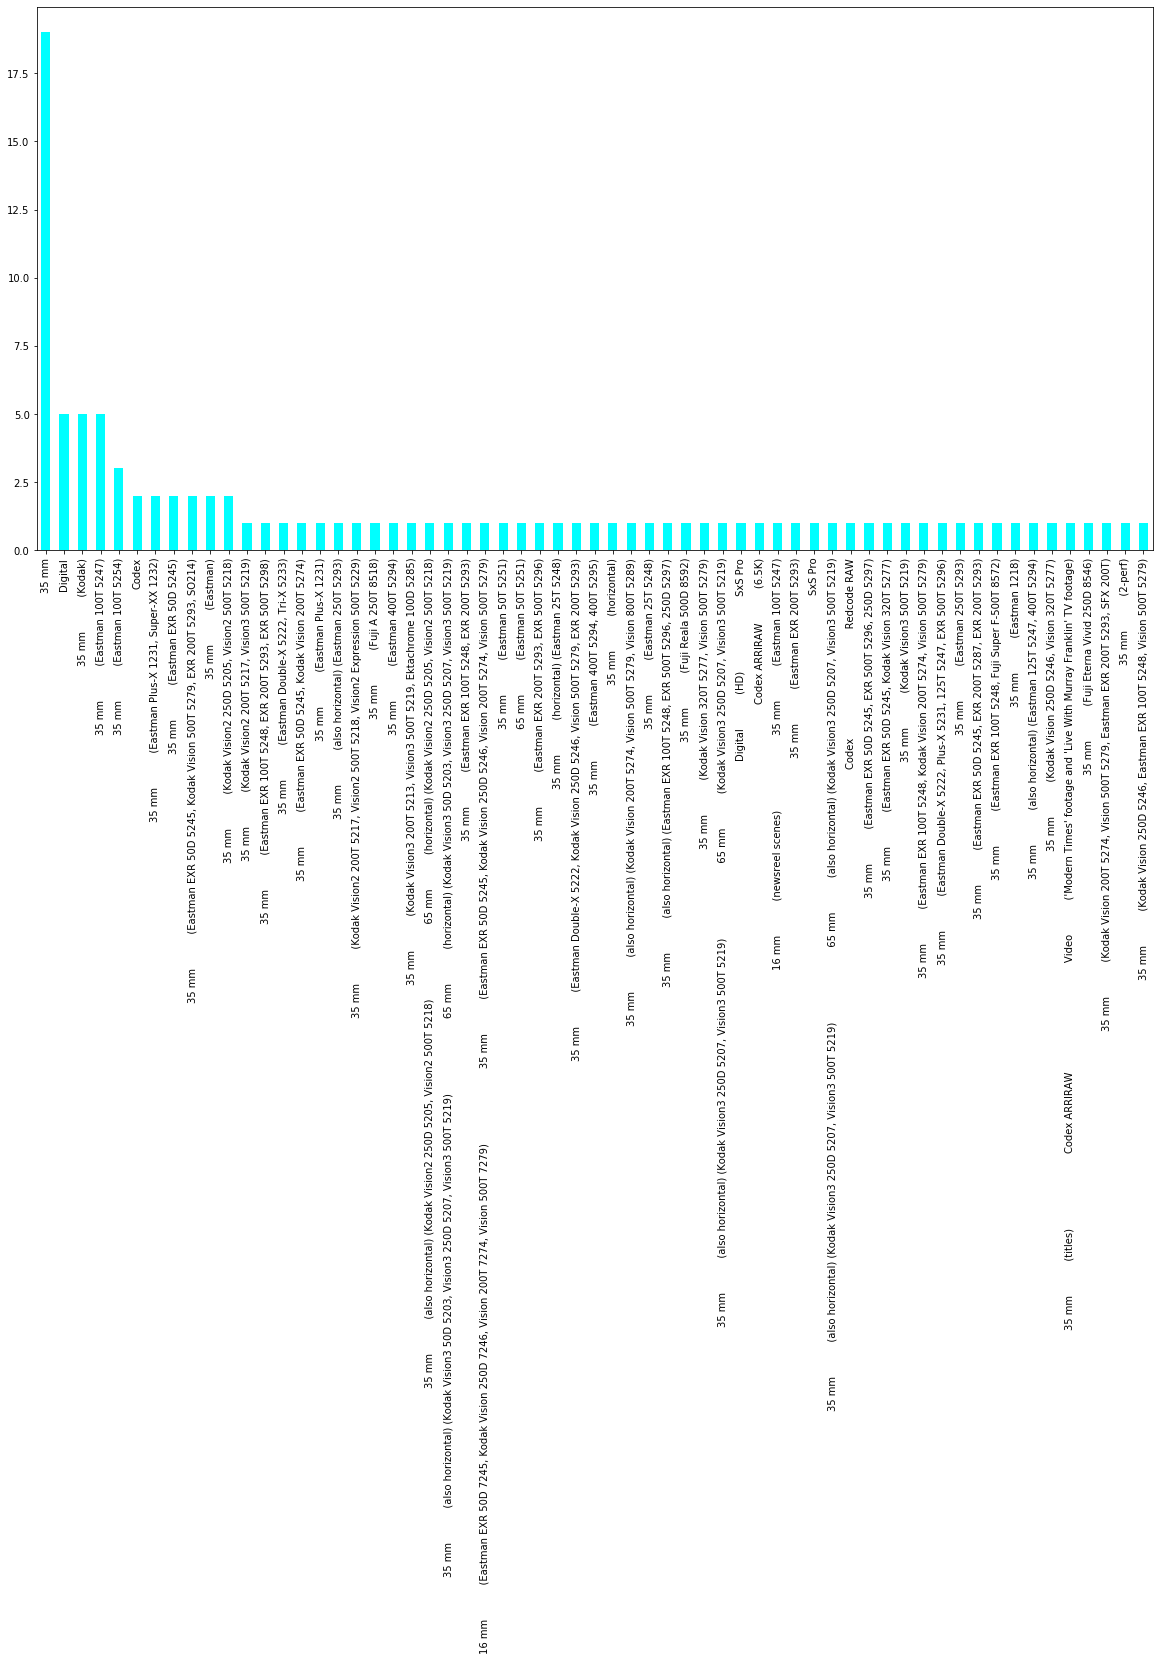

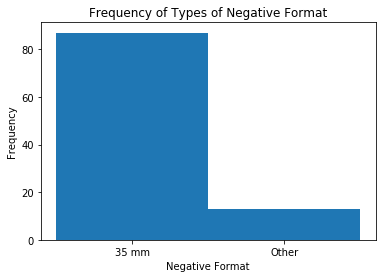

In [4]:
# Get Frequency of Negative Format
# Use the first Bar Chart to make a second concise bar chart

df['Negative Format'].value_counts().plot( kind='bar', figsize=(20, 10), color= 'cyan')
def negative_format(x):
    
    format_count=0
    other=0
    for form in df['Negative Format']:
        if type(form)== float:
            other+=1
        elif '35 mm' in form:
            format_count+=1
        else:
            other+=1
    fig, ax  = plt.subplots()
    ax.bar([1,2],[format_count,other], width=1, tick_label=['35 mm', 'Other'], align='center')
    ax.set_xlabel('Negative Format')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Types of Negative Format')
    plt.show()
negative_format(df['Negative Format'])

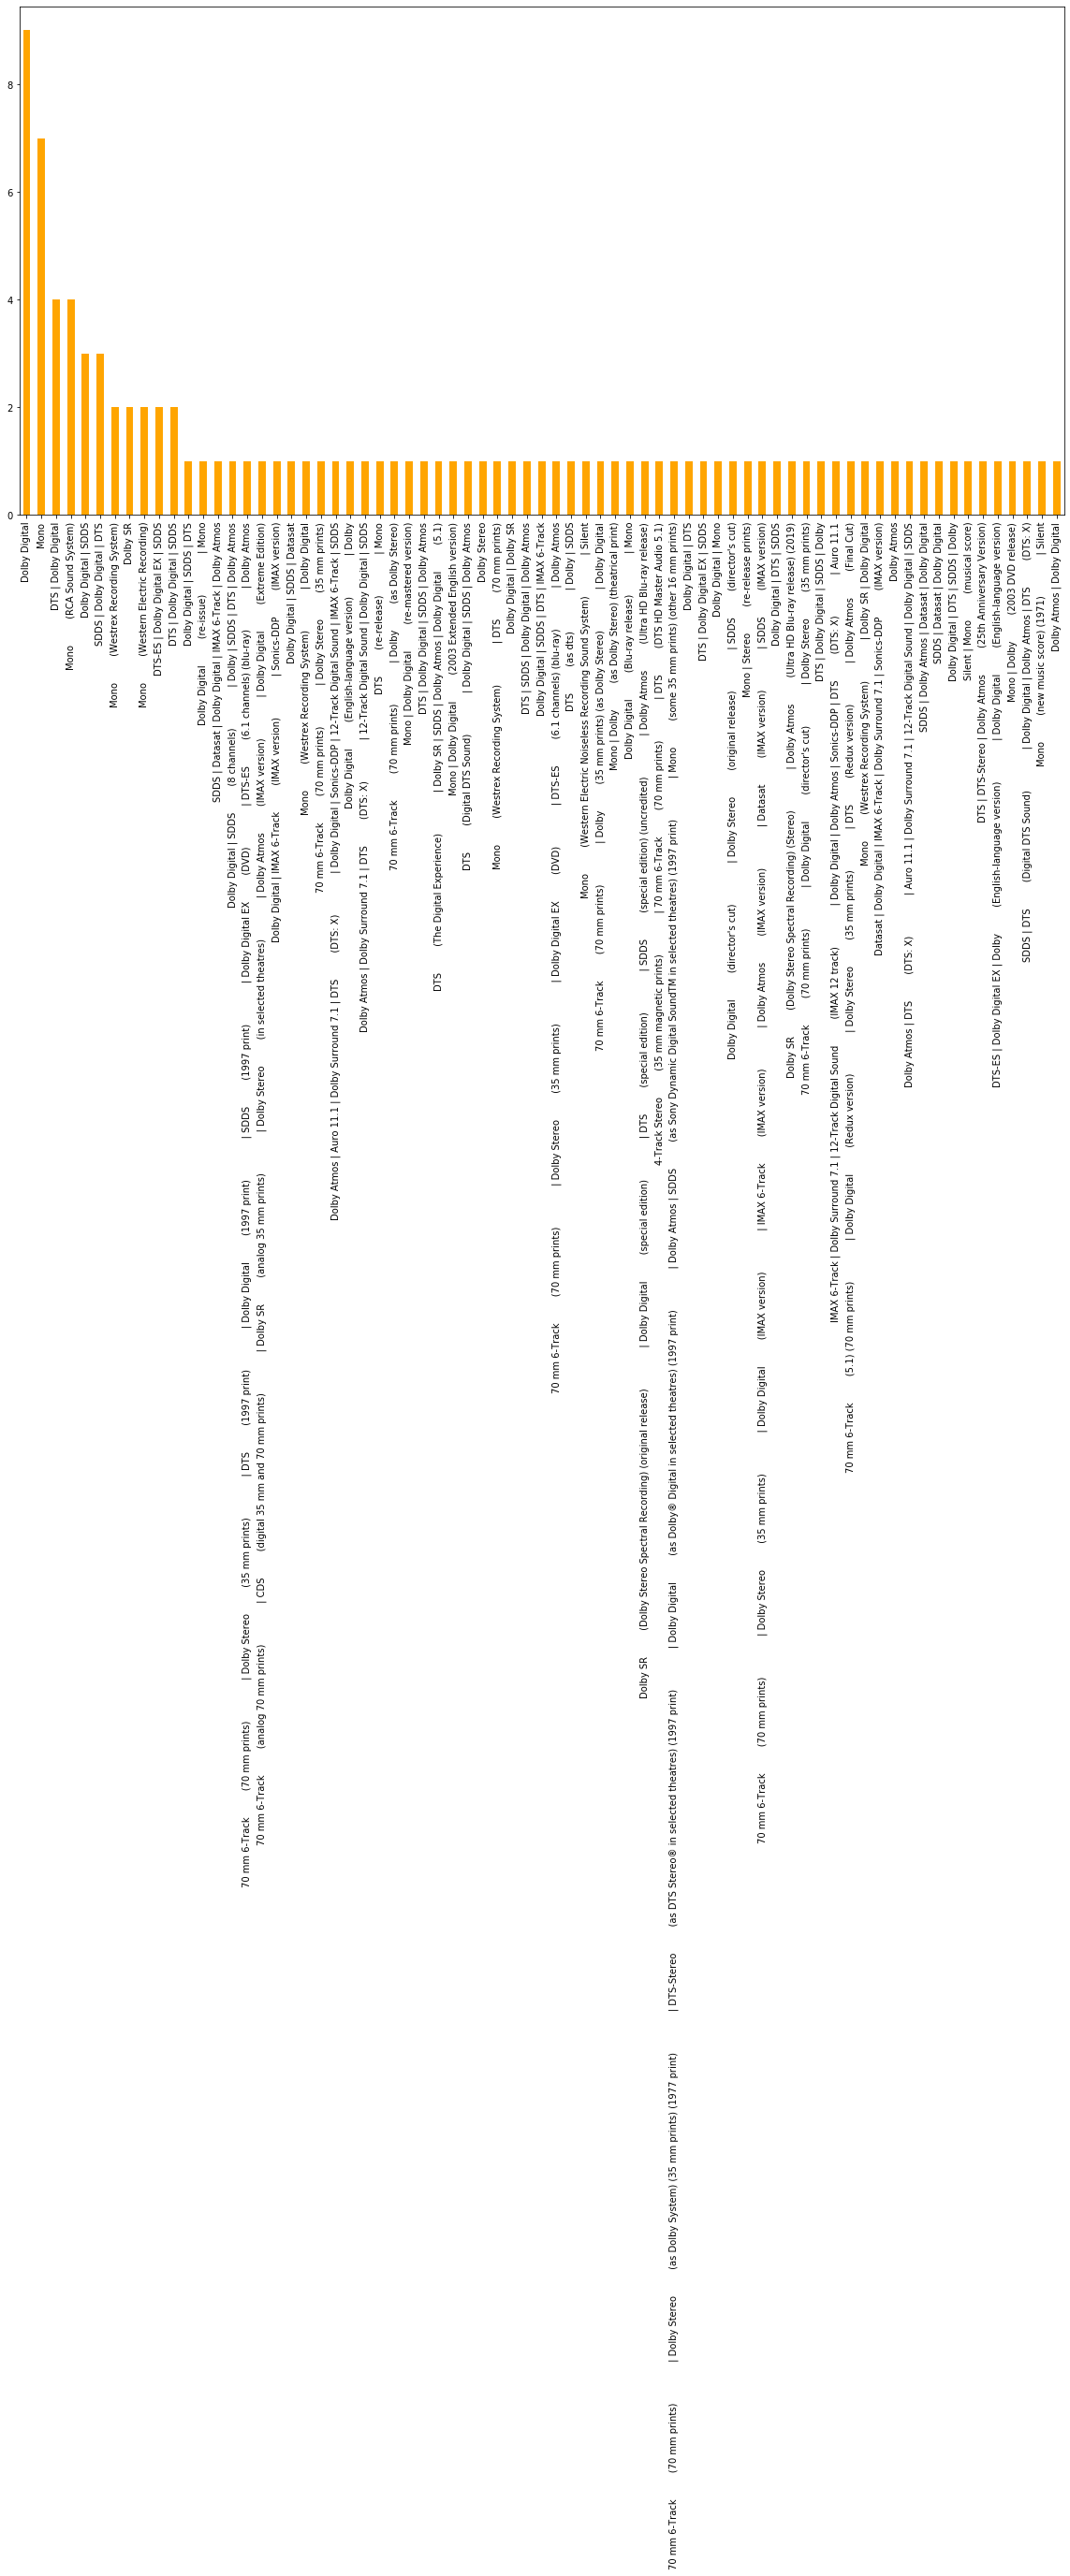

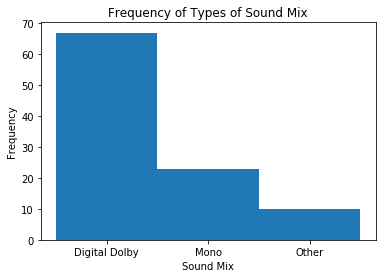

In [5]:
#Get the SoundMix Frequency
df['Sound Mix'].value_counts().plot( kind='bar', figsize=(20, 10), color='orange')
def soundmix(x):
    digital_dolby=0
    other_sounds=0
    mono=0
    for form in x:
        if type(form) == float:
            other_sounds+=1
        elif 'Dolby Digital' in form:
            digital_dolby+=1
        elif 'Mono' in form:
            mono+= 1
        else:
            other_sounds+=1

    fig, ax  = plt.subplots()
    ax.bar([1,2,3],[digital_dolby,mono, other_sounds], width=1, tick_label=['Digital Dolby', 'Mono','Other'], align='center')
    ax.set_xlabel('Sound Mix')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Types of Sound Mix')
    plt.show()

soundmix(df['Sound Mix'])

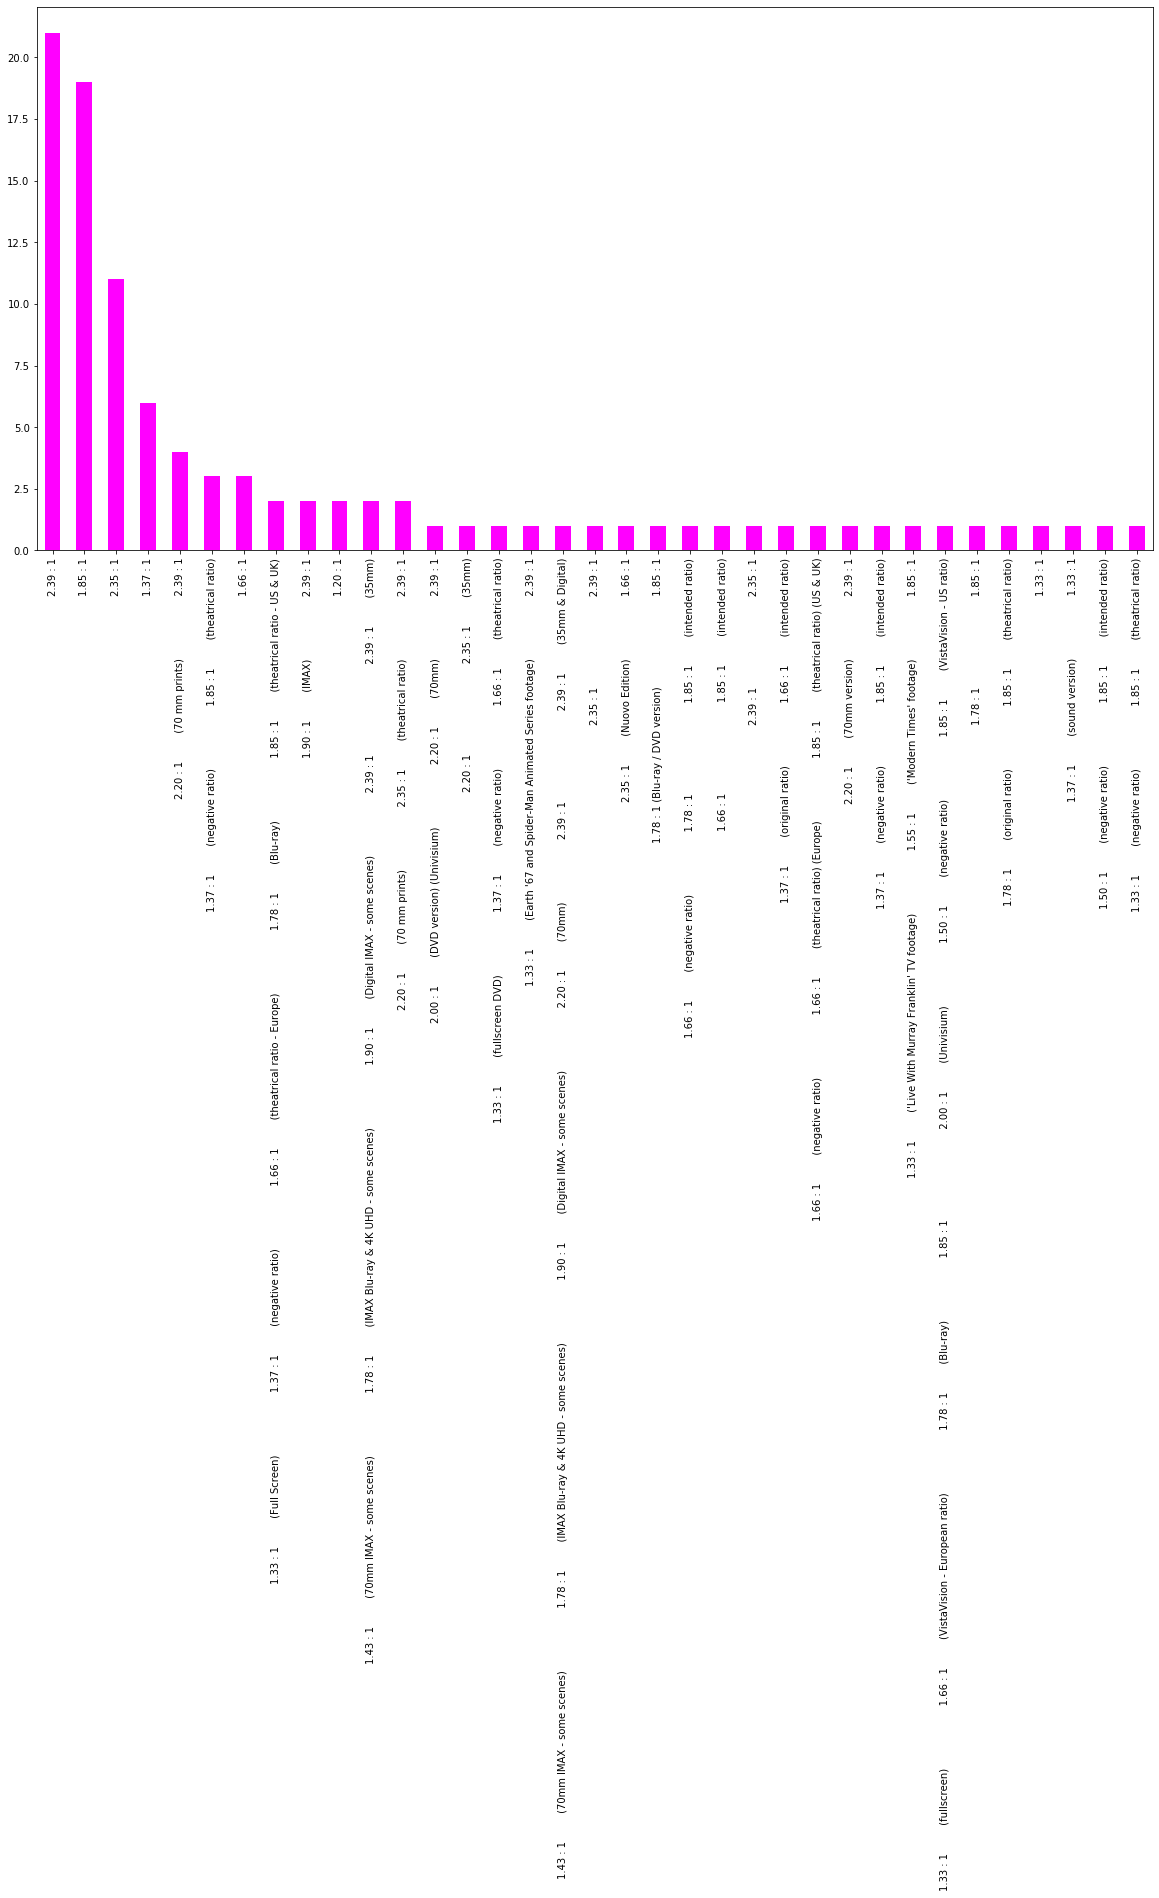

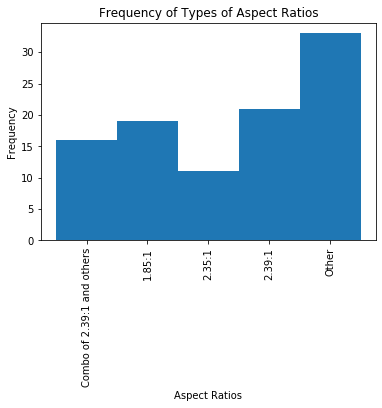

In [6]:
# Find Frequency of Aspect Ratios

df['Aspect Ratio'].value_counts().plot( kind='bar', figsize=(20, 10), color='magenta')
def aspectratio(x):

    asp_combo=0
    f_185=0
    f_235=0
    f_239=0
    other1=0
    for asp in x:

        if '2.39 : 1'!=asp and '2.39 : 1' in asp:
            asp_combo+=1
        elif '1.85 : 1'== asp:
            f_185+=1
        elif '2.39 : 1'== asp:
            f_239+=1
        elif '2.35 : 1'== asp:

            f_235+=1
        else:
            other1+=1
    fig, ax  = plt.subplots()
    ax.bar([1,2,3,4,5],[asp_combo, f_185,f_235,f_239,other1], width=1, tick_label=['Combo of 2.39 and others', '1.85:1','2.35:1','2.39:1','Other'], align='center')
    ax.set_xlabel('Aspect Ratios')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Types of Aspect Ratios')
    ax.set_xticklabels(labels=['Combo of 2.39:1 and others', '1.85:1','2.35:1','2.39:1','Other'], rotation=90)
    plt.show() 
aspectratio(df['Aspect Ratio'])


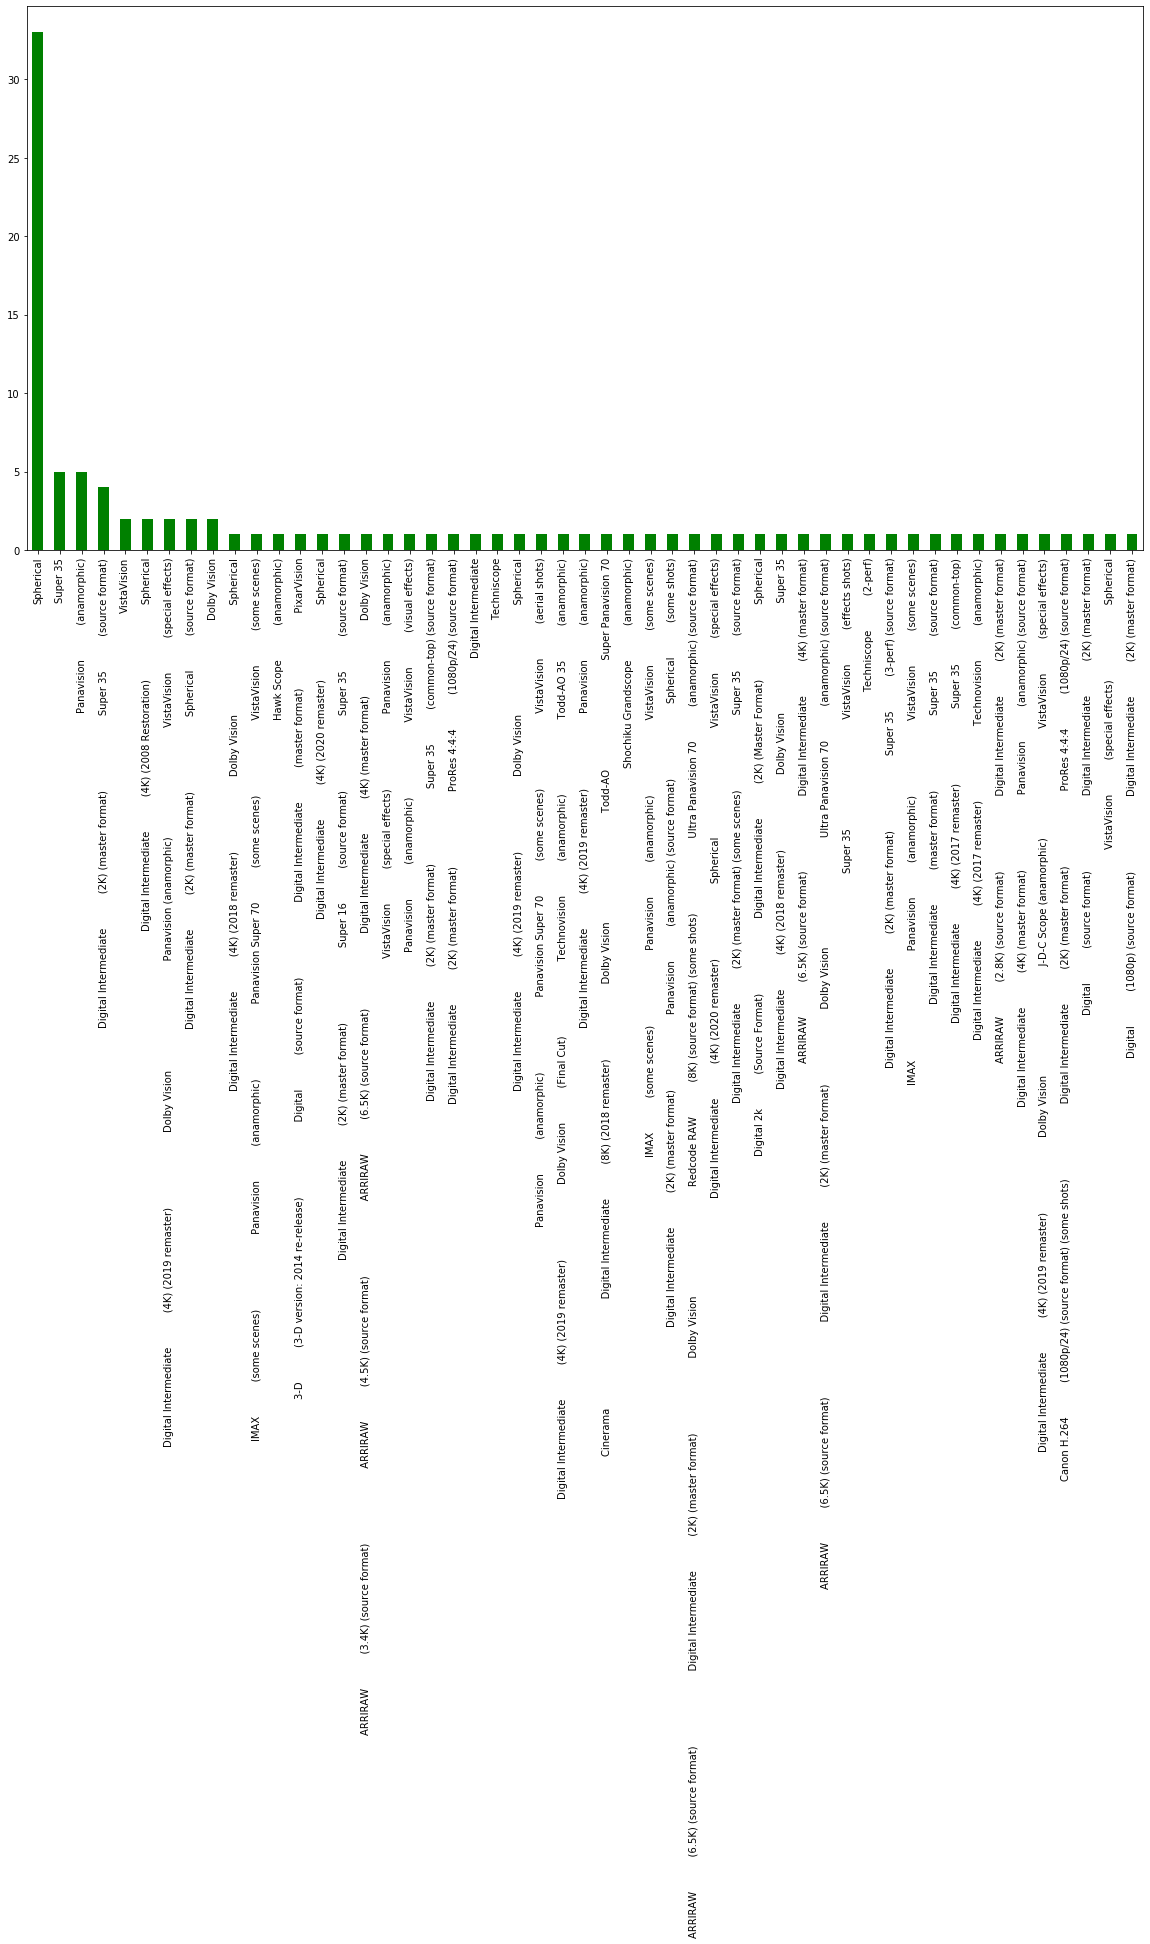

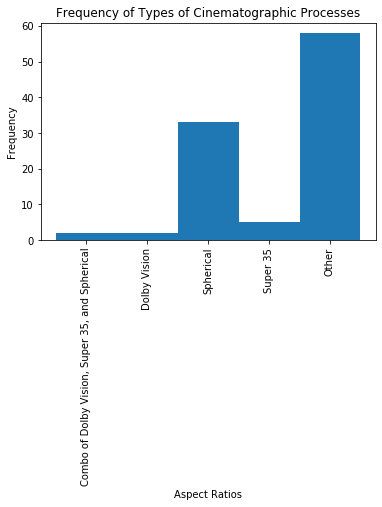

In [7]:
# Get the Cinematographic Processes
# Again use the first chart to make a second concise bar chart 
df['Cinematographic Process'].value_counts().plot( kind='bar', figsize=(20, 10),color='green')
def cinematographic(x):
    combo=0
    dolby_vision=0
    spherical=0
    super_35=0
    others=0
    for cinema in x:
        if type(cinema)==float:
            others+=1
        elif 'Dolby Vision'in cinema and 'Spherical' in cinema:
            combo+=1
        elif 'Dolby Vision' == cinema:
            dolby_vision+=1
        elif 'Spherical' == cinema:
            spherical+=1
        elif 'Super 35'== cinema:
            super_35+=1
        else:
            others+=1
    fig, ax  = plt.subplots()
    ax.bar([1,2,3,4,5],[combo, dolby_vision,spherical,super_35,others], width=1, tick_label=['Combo of Dolby Vision, Super 35, and Spherical','Dolby Vision','Spherical','Super 35','Other'], align='center')
    ax.set_xlabel('Aspect Ratios')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Types of Cinematographic Processes')
    ax.set_xticklabels(labels=['Combo of Dolby Vision, Super 35, and Spherical','Dolby Vision','Spherical','Super 35','Other'], rotation=90)
cinematographic(df['Cinematographic Process'])

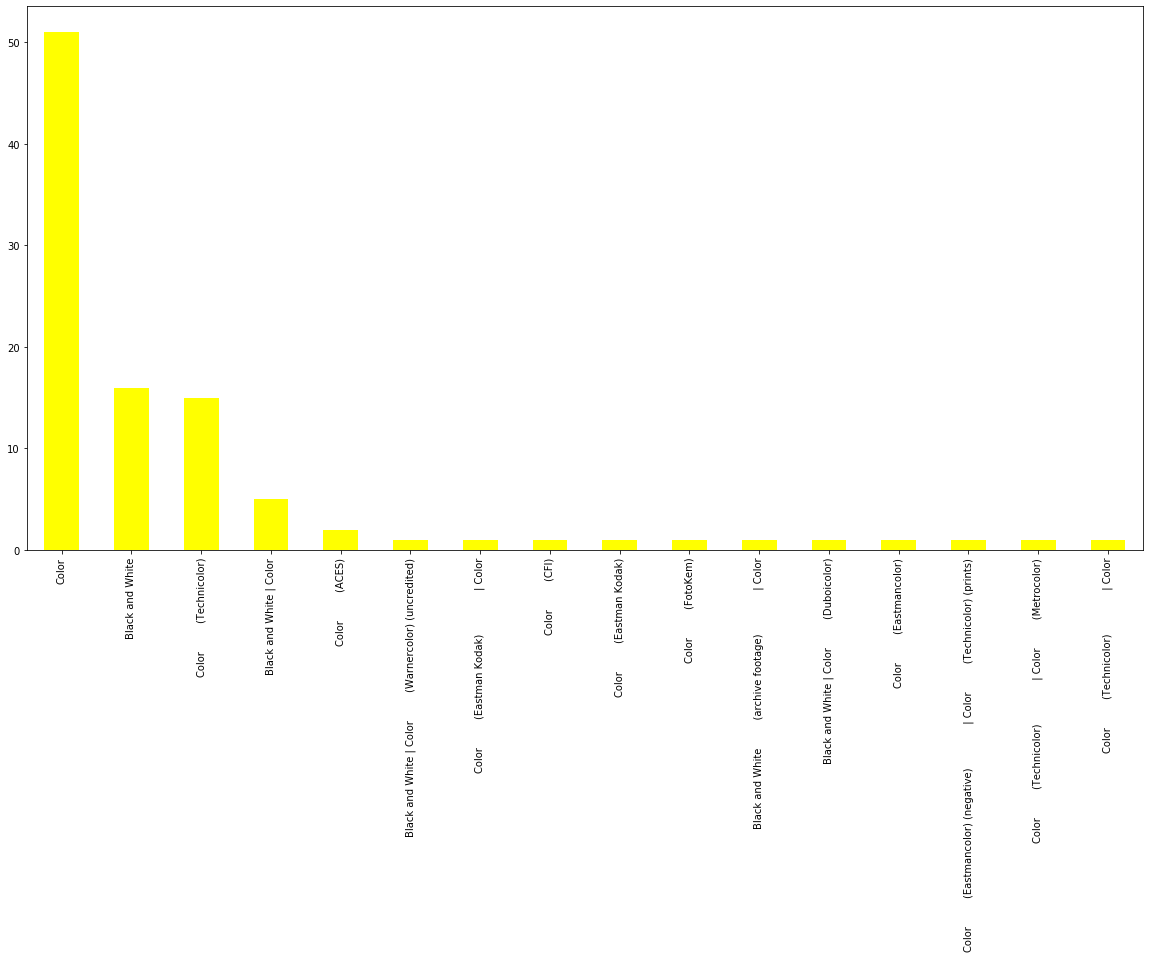

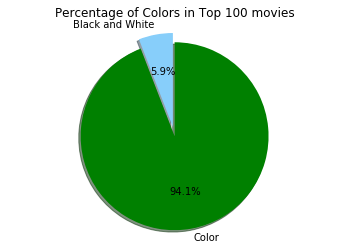

In [8]:
df['Color'].value_counts().plot( kind='bar', figsize=(20, 10), color='yellow')
def color(x):
    
    color=0
    black_white=0
    for col in x:
        if 'Color' in col:
            color=+1
        elif 'Black and White':
            black_white+=1
    labels=  'Black and White','Color'
    sizes=[color,black_white]
    explode=[0.1,0]
    color='lightskyblue', 'green'
    fig, ax  = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors= color ,explode= explode,shadow=True, startangle=90)
    ax.axis('equal')  
    ax.set_title('Percentage of Colors in Top 100 movies')

    plt.show()
color(df['Color'])

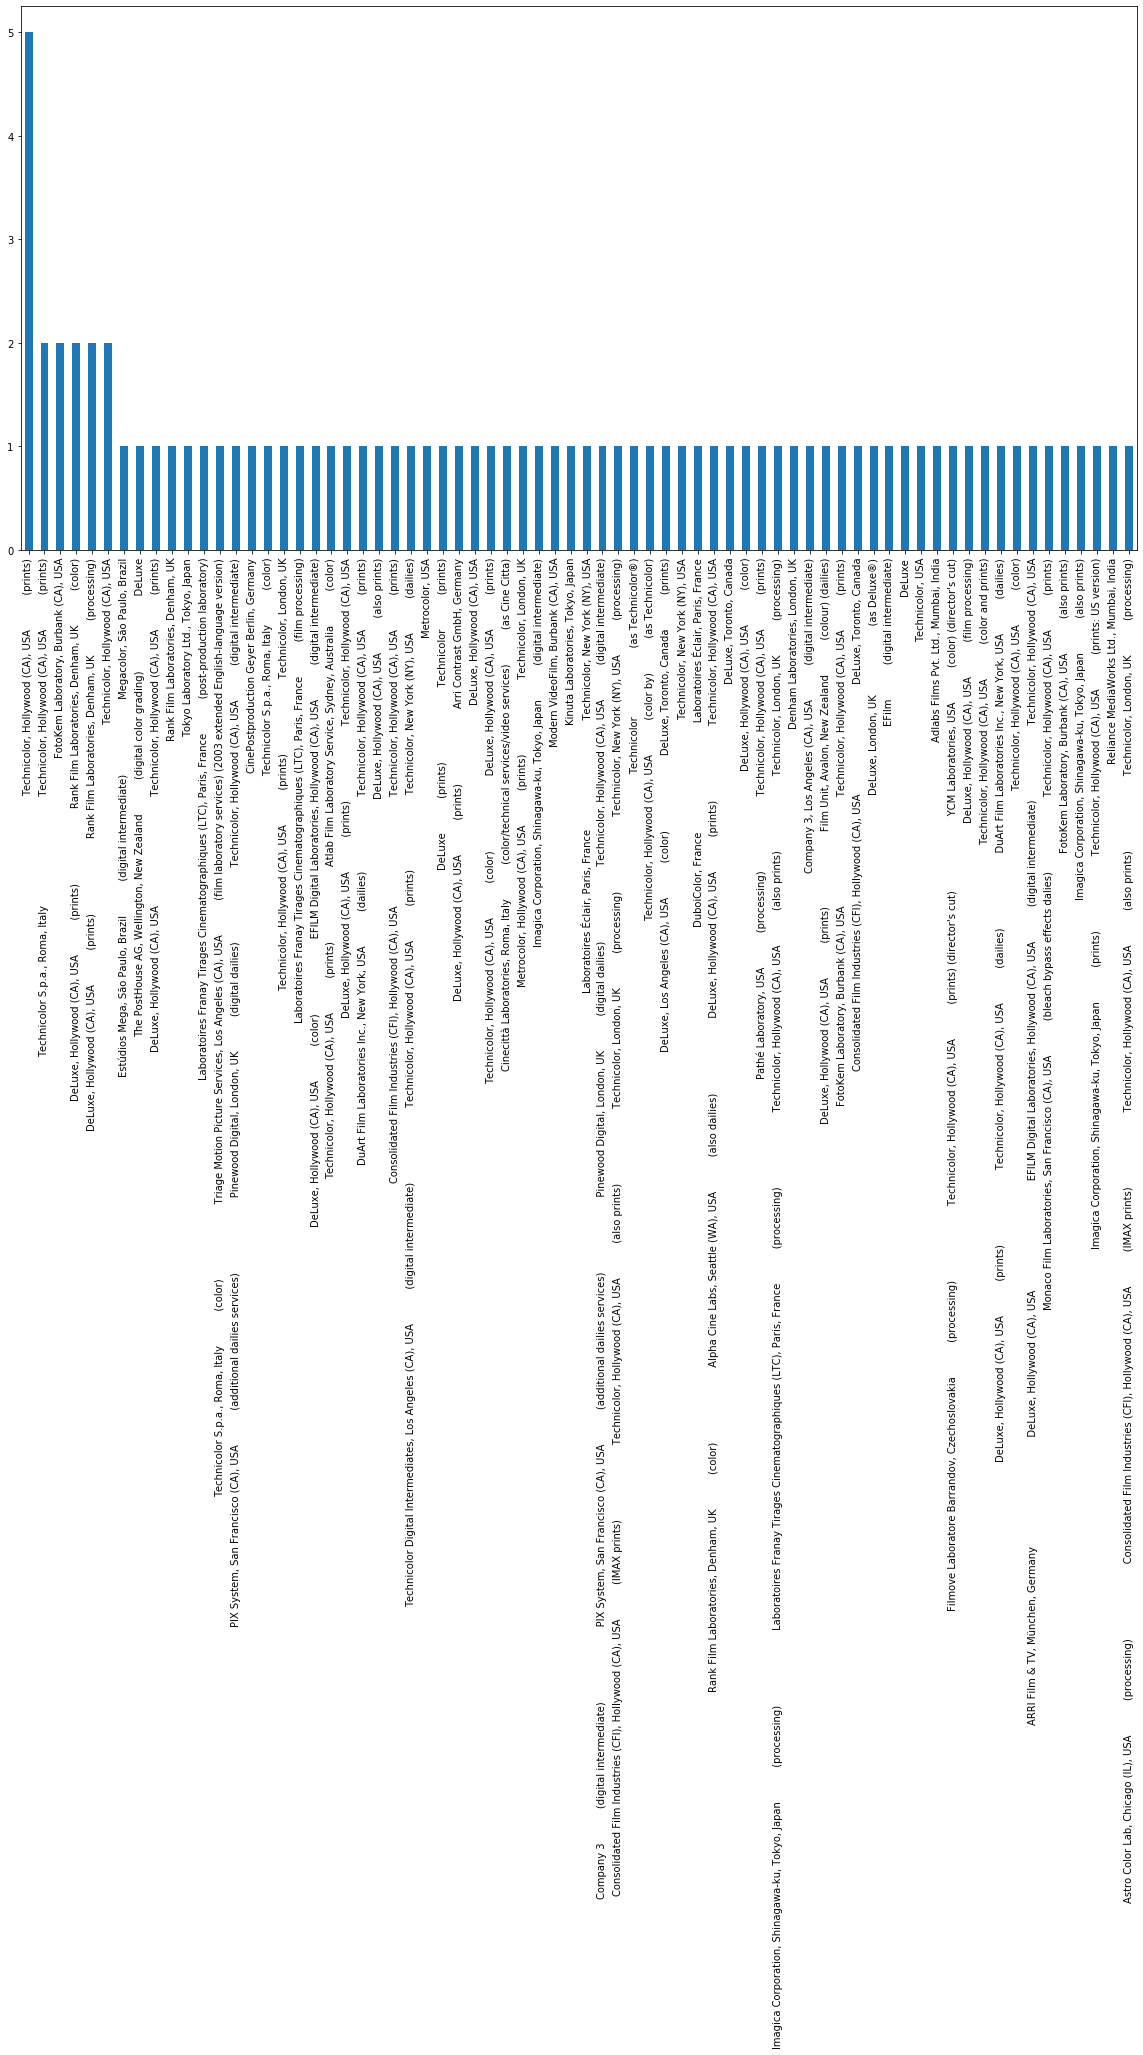

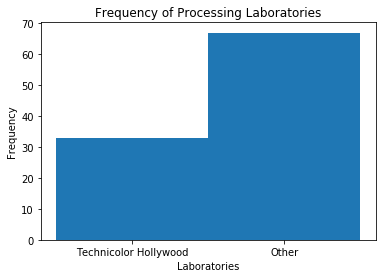

In [9]:
# Get the Film Laboratory
df['Laboratory'].value_counts().plot( kind='bar', figsize=(20, 10))
# Since there are alot of Technicolor, Hollywood appearances, make a plot of that lab vs the other labs
def laboratories(x):
    labs=0
    others=0
    for lab in x:
        
        if type(lab)== float:
            others+=1
        elif 'Technicolor, Hollywood' in lab:
            labs+=1
        else:
            others+=1
    fig, ax  = plt.subplots()
    ax.bar([1,2],[labs,others], width=1, tick_label=['Technicolor Hollywood', 'Other'], align='center')
    ax.set_xlabel('Laboratories')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Processing Laboratories')
    plt.show()   
laboratories(df['Laboratory'])
